In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph


In [26]:
iris = datasets.load_iris()
X_0 = iris.data[:, [0,1,2]]# testing three features
y_0 = iris.target
#print(X)
print('Class labels:', np.unique(y_0))


#spilt our training data
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    X_0, y_0, test_size=0.3, random_state=1, stratify=y_0)
"""
#Standardize features
sc = StandardScaler()
sc.fit(X_train_0)
X_train_std_0 = sc.transform(X_train_0)
X_test_std_0 = sc.transform(X_test_0)



X_combined_std_0 = np.vstack((X_train_std_0, X_test_std_0))
y_combined_0 = np.hstack((y_train_0, y_test_0))
"""

Class labels: [0 1 2]


'\n#Standardize features\nsc = StandardScaler()\nsc.fit(X_train_0)\nX_train_std_0 = sc.transform(X_train_0)\nX_test_std_0 = sc.transform(X_test_0)\n\n\n\nX_combined_std_0 = np.vstack((X_train_std_0, X_test_std_0))\ny_combined_0 = np.hstack((y_train_0, y_test_0))\n'

0.9714285714285714


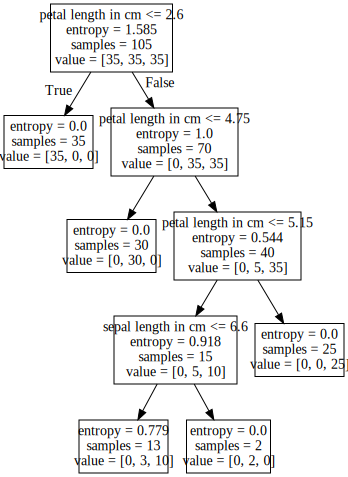

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train_0, y_train_0)
X_combined = np.vstack((X_train_0, X_test_0))
y_combined = np.hstack((y_train_0, y_test_0))
# plot the final decision gree
print(tree.score(X_train_0,y_train_0))#obtaining scores
export_graphviz(tree, out_file='T1.dot', feature_names=['sepal length in cm','sepal width in cm','petal length in cm'])
with open('T1.dot') as f:dot_graph = f.read()
graphviz.Source(dot_graph)

Class labels: [0 1 2]
0.9523809523809523


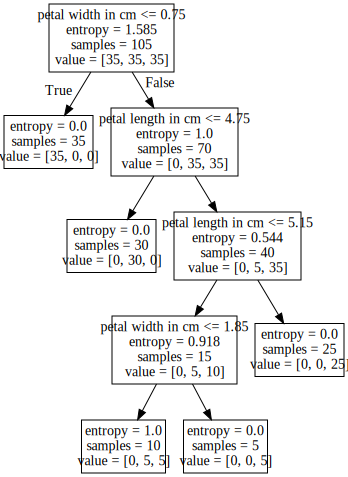

In [51]:
X_1 = iris.data[:, [0,1,2,3]]# Testing four features
y_1 = iris.target
#print(X)
print('Class labels:', np.unique(y_0))


#spilt our training data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.3, random_state=1, stratify=y_1)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=1,min_impurity_decrease=0)
#change impurity method to entropy
tree.fit(X_train_1, y_train_1)
X_combined = np.vstack((X_train_1, X_test_1))
y_combined = np.hstack((y_train_1, y_test_1))
print(tree.score(X_train_1,y_train_1))#obtaining scores
# plot the final decision gree
export_graphviz(tree, out_file='T1.dot', feature_names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

My test the different type of impurity gini and entropy does chance the score of my result. When I am testing four feature at once with gini it goes from 97 percent. But when  I change it to entropy the score drop too 95 percent. Since impurity N p is the total number of samples at the parent node, and N j is the number of samples in the jth child node(class book definiation). We need to be careful on what we are asking from our data and set our impurity  to the right one.